<a href="https://colab.research.google.com/github/manishaachary13/News-Sentiment-Analysis-Project/blob/main/News_Sent_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **News Sentiment Analysis (Fake vs Real News Detection)**

## **Project Summary**

1. Dataset Overview
2. EDA(Exploratory Data Analysis)
3. Model Training
4. Model Evaluation
5. Sentiment Analysis using VADER
6.Feature Importance & Model Explainability
7.Export Data Model
8. Alt Step(Build an interactive app)

## **Dataset Overview**

### **Import libraries**

In [ ]:
# 📦 Data Handling & Preprocessing
import pandas as pd                   # For data manipulation and analysis
import numpy as np                    # For numerical operations
import re                             # For regular expressions (text cleaning)
import nltk                           # Natural Language Toolkit, for text processing
import matplotlib.pyplot as plt       # For creating visualizations
import seaborn as sns                 # For statistical visualizations built on top of matplotlib

from collections import Counter       # For counting word frequencies
from google.colab import files        # To upload/download files in Google Colab

# 📝 NLP (Natural Language Processing)
from nltk.tokenize import word_tokenize          # For tokenizing sentences into words
from nltk.corpus import stopwords                # For accessing common stop words

# 🔀 Data Splitting
from sklearn.model_selection import train_test_split   # For splitting dataset into training and testing sets

# 🔠 Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer   # To convert text data into TF-IDF feature vectors

# 🤖 Machine Learning Models
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes classifier for text classification
from sklearn.linear_model import LogisticRegression   # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier    # Random Forest classifier
from sklearn.svm import SVC                            # Support Vector Machine classifier

# ✅ Model Evaluation Metrics
from sklearn.metrics import (
    classification_report,      # Detailed report of precision, recall, f1-score
    confusion_matrix,           # Confusion matrix to compare actual vs predicted labels
    accuracy_score,             # Accuracy metric
    precision_score,            # Precision metric
    recall_score,               # Recall metric
    f1_score,                   # F1-score metric
    roc_auc_score,              # Area Under ROC Curve
    roc_curve,                  # ROC Curve plotting
    precision_recall_curve,     # Precision-Recall curve
    average_precision_score     # Average precision score for PR curves
)

# 📊 Model Validation
from sklearn.model_selection import cross_val_score    # For performing cross-validation



###📥 **Dataset Import**

The dataset used in this project was downloaded from **Kaggle**, containing two files: **Fake.csv** and **True.csv**. These files were manually uploaded into the Google Colab environment using the google.colab.files module.

In [ ]:
files.upload()  # Choose and upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rmanishaachary","key":"d2153ccfc5afa3a6fd1b945ba92d4bf3"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
!unzip fake-and-real-news-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


### **Downloading NLTK Resources & Initializing Stopwords**

**Purpose:**
This step ensures that necessary Natural Language Toolkit (NLTK) resources are available for text preprocessing. It downloads tokenizers (punkt) and English stopwords, which are used to split text into tokens and remove common irrelevant words during cleaning. The stop_words set is initialized for efficient filtering in later steps.

In [ ]:
# NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### **Load and Label data**

In [ ]:
# Load data
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

# Add source label
fake['source'] = 'fake'
real['source'] = 'real'



### **Datasets First View**

In [ ]:
# Inspect the data
print("Fake News Head:")
print(fake.head())
print("\nReal News Head:")
print(real.head())


Fake News Head:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date source  
0  December 31, 2017   fake  
1  December 31, 2017   fake  
2  December 30, 2017   fake  
3  December 29, 2017   fake  
4  December 25, 2017   fake  

Real News Head:
                                               title  \
0  As U.S

### **Inspecting Dataset Structure – Fake & Real News**

In [ ]:

print("\nFake Info:")
print(fake.info())

print("\nReal Info:")
print(real.info())



Fake Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   source   23481 non-null  object
dtypes: object(5)
memory usage: 917.4+ KB
None

Real Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   source   21417 non-null  object
dtypes: object(5)
memory usage: 836.7+ KB
None


### **Descriptive Statistics for Fake & Real News**

In [ ]:
print("\nFake Description:")
print(fake.describe(include='all'))
print("\nReal Description:")
print(real.describe(include='all'))



Fake Description:
                                                    title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date source  
count          23481  23481  
unique          1681      1  
top     May 10, 2017   fake  
freq              46  23481  

Real Description:
                                                    title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                             

### **Missing Values Check**

In [ ]:

print("\nChecking for nulls:")
print(fake.isnull().sum())
print()
print(real.isnull().sum())



Checking for nulls:
title      0
text       0
subject    0
date       0
source     0
dtype: int64

title      0
text       0
subject    0
date       0
source     0
dtype: int64


 ### Quick Overview of Dataset Outputs

The dataset comprises two parts: Fake News and Real News, each containing 5 columns – *title, text, subject, date, and source*. A preview of the first five records from both datasets shows that each news item includes a headline and full article content, along with metadata such as the publication date and category. The source column clearly labels the origin as either *fake or real*.

The .info() output reveals that:
* The Fake News dataset contains 23,481 entries.
* The Real News dataset contains 21,417 entries.
* All columns in both datasets have non-null values and are of type object.

The *.describe()* output indicates the number of unique values in each column and highlights the most frequent entries *(top)* and their counts *(freq).* For instance, the most common subject in Fake News is **"News"** with 9,050 occurrences, while in Real News it is **"politicsNews"** with 11,272 entries.

Finally, the *isnull().sum()* results confirm that there are no missing values in either dataset, ensuring they are ready for further preprocessing and analysis.



### **Assign Labels to News Data**

In [ ]:
# Add labels
fake['label'] = 'FAKE'
real['label'] = 'REAL'


### **Combine and Shuffle Datasets**

In [ ]:
df = pd.concat([fake, real]).sample(frac=1).reset_index(drop=True)

### **Inspect Combined Dataset**

In [ ]:
print("\nCombined Data Head:")
print(df.head())
print("\nCombined Info:")
print(df.info())



Combined Data Head:
                                               title  \
0  OBAMA DEFENDS KAEPERNICK’S Decision to Disresp...   
1  DNC Chair Asks Democrat Members Of Congress To...   
2  Kidnapped aid workers in South Sudan released:...   
3   Birmingham Tells Alabama GOP To Go F**k Thems...   
4  Fed up with Washington, Trump's 'deplorables' ...   

                                                text       subject  \
0  When Obama had the opportunity to speak out ag...     left-news   
1  Debbie Wasserman-Schultz didn t ask members of...     left-news   
2  JUBA (Reuters) - Six aid workers kidnapped by ...     worldnews   
3  Alabama Republicans were quickly trying to ban...          News   
4  MIAMI/WASHINGTON (Reuters) - Fed up with Washi...  politicsNews   

                 date source label  
0         Sep 5, 2016   fake  FAKE  
1        Dec 15, 2015   fake  FAKE  
2  December 20, 2017    real  REAL  
3   February 24, 2016   fake  FAKE  
4   November 9, 2016    real  REAL  

In [ ]:
# Define a set of common English stopwords to be removed during text preprocessing
stop_words = set(stopwords.words('english'))

In [ ]:
# Text cleaning
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', '  ', str(text))  # Remove non-letter characters
    tokens = word_tokenize(text.lower())         # Lowercase and tokenize
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
print("\nCleaned Text Sample:")
print(df[['text', 'clean_text']].head())



Cleaned Text Sample:
                                                text  \
0  When Obama had the opportunity to speak out ag...   
1  Debbie Wasserman-Schultz didn t ask members of...   
2  JUBA (Reuters) - Six aid workers kidnapped by ...   
3  Alabama Republicans were quickly trying to ban...   
4  MIAMI/WASHINGTON (Reuters) - Fed up with Washi...   

                                          clean_text  
0  obama opportunity speak quarterback colin kaep...  
1  debbie wasserman schultz ask members congress ...  
2  juba reuters six aid workers kidnapped rebels ...  
3  alabama republicans quickly trying ban cities ...  
4  miami washington reuters fed washington feelin...  


### 🧾 Overview of Combined and Cleaned Dataset

After merging the Fake and Real news datasets, the combined DataFrame contains 44,898 news articles. Each record includes a title, full text, subject, date, source, and a new label column that clearly indicates whether the article is "FAKE" or "REAL". The .info() confirms that there are no missing values across any of the six columns, and all columns are of object type, indicating they contain textual data.

Additionally, a sample of cleaned text shows that the preprocessing step has been applied effectively—removing stopwords, punctuation, and standardizing the case. This cleaned version of the text column will be crucial for accurate vectorization and machine learning model training.

##  **📊Exploratory Data Analysis (EDA)**

### **Chart -1:**

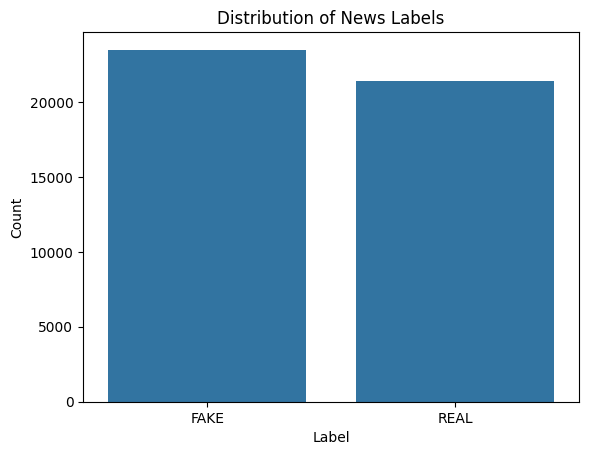

In [ ]:
# Label Distribution
sns.countplot(data=df, x='label')
plt.title('Distribution of News Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


**🔍 Insight from Label Distribution Chart:** <br>
The dataset has a fairly balanced distribution of REAL and FAKE news, with slightly more fake news articles.

✅ This balance is ideal for training classification models without strong bias toward either class.

### **Chart -2:**

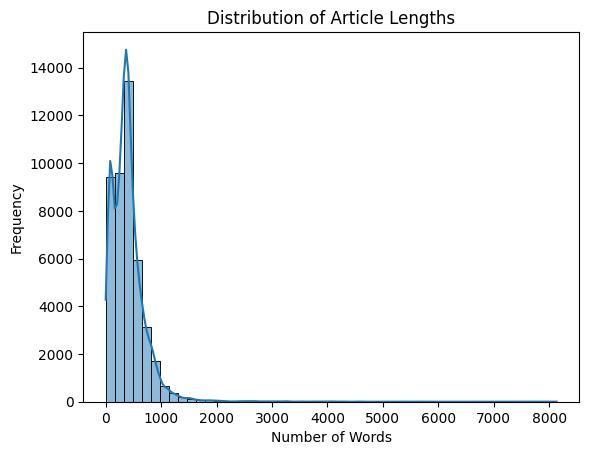

In [ ]:
# Length of articles
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


**📊 Insight from Article Length Distribution:**<br>
Most articles contain 200–800 words, with a sharp drop-off after that.<br>
✅ This suggests the dataset consists mainly of short to medium-length articles, which are well-suited for NLP models in terms of processing and training efficiency.









### **Chart -3:**

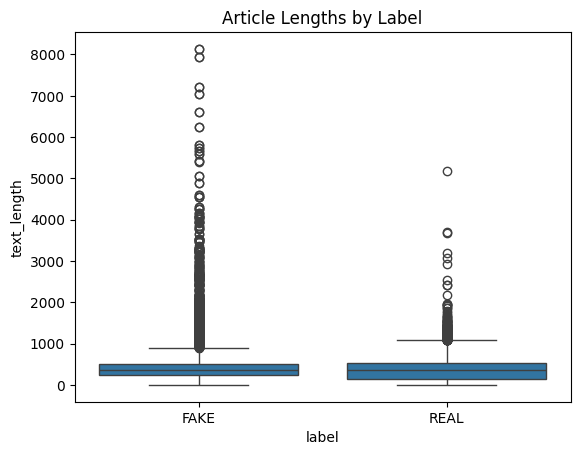

In [ ]:
# Article Length by Label
sns.boxplot(data=df, x='label', y='text_length')
plt.title('Article Lengths by Label')
plt.show()


**📦 Insight from Article Lengths by Label:**
* FAKE news articles tend to have more extreme outliers and slightly higher average lengths.
* REAL news articles are generally more consistent in length.

✅ This suggests that fake news might use longer or overly detailed text to appear more convincing.

### **Chart -4:**

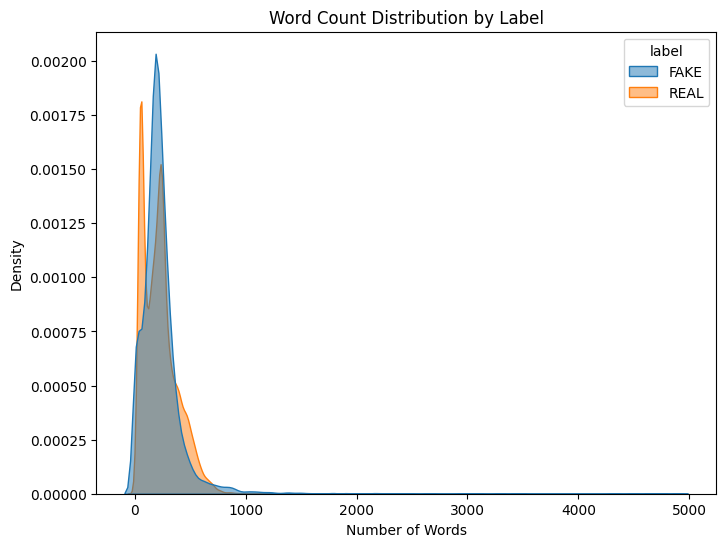

In [ ]:
# Word Count Distribution by Label
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='word_count', hue='label', fill=True, alpha=0.5)
plt.title("Word Count Distribution by Label")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.show()


**📊 Insight from Word Count Distribution by Label:**
* Both REAL and FAKE articles mostly range between 0–1000 words.
* FAKE articles have a slightly higher density around 300–400 words, showing they often stick to shorter lengths.
* REAL articles show more variation, with a broader spread and a longer right tail, indicating more in-depth content.

✅ Conclusion: Real news tends to be lengthier and more variable, while fake news is more concise and consistent in length.

### **Chart -5:**

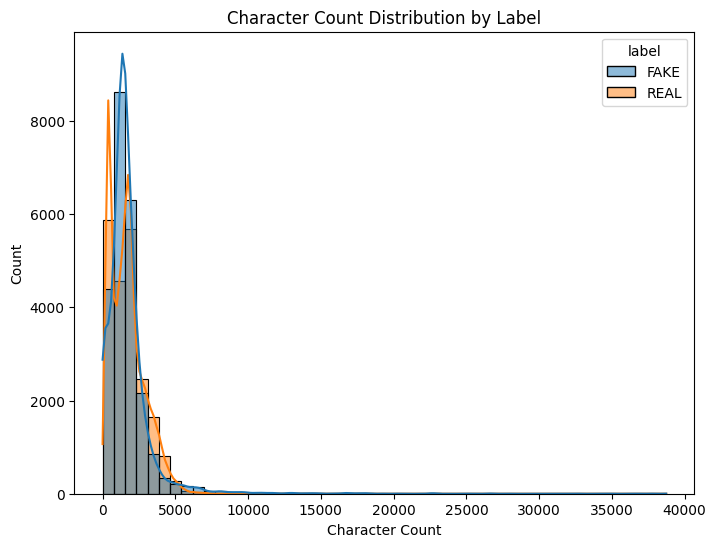

In [ ]:
# Character Count per Article
df['char_count'] = df['clean_text'].apply(len)
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='char_count', hue='label', bins=50, kde=True)
plt.title("Character Count Distribution by Label")
plt.xlabel("Character Count")
plt.show()


**✍️ Insights from Character Count Distribution by Label:**
* Both REAL and FAKE articles show a right-skewed distribution — most articles are short, with a few being very long.
* FAKE articles are more concentrated between 1000–3000 characters, suggesting they are typically shorter and more uniform in length.
* REAL articles display greater variability, with more articles extending beyond 4000 characters.

✅ Conclusion: Real news tends to contain more detailed writing (longer character counts), while fake news is generally more concise and follows a tighter length pattern.

### **Chart -6:**

<ipython-input-22-d81aa6206cd8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=fake_df, palette='Reds_r')
<ipython-input-22-d81aa6206cd8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=real_df, palette='Greens_r')


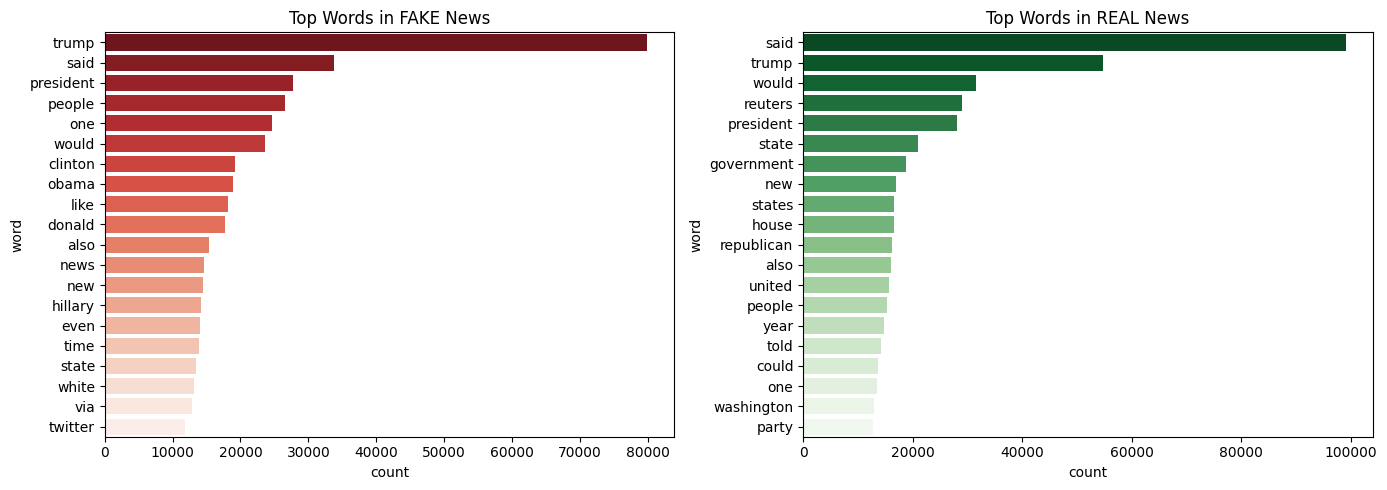

In [ ]:
# Top Words in FAKE vs REAL News

fake_words = ' '.join(df[df['label'] == 'FAKE']['clean_text']).split()
real_words = ' '.join(df[df['label'] == 'REAL']['clean_text']).split()

fake_common = Counter(fake_words).most_common(20)
real_common = Counter(real_words).most_common(20)

fake_df = pd.DataFrame(fake_common, columns=['word', 'count'])
real_df = pd.DataFrame(real_common, columns=['word', 'count'])

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='count', y='word', data=fake_df, palette='Reds_r')
plt.title('Top Words in FAKE News')

plt.subplot(1, 2, 2)
sns.barplot(x='count', y='word', data=real_df, palette='Greens_r')
plt.title('Top Words in REAL News')
plt.tight_layout()
plt.show()


**✍️ Insights from Top Words in FAKE vs REAL News:**
* **📌 Fake News:**
 - Dominated by people-centric and political names like trump, obama, clinton, donald, and hillary.
 - Heavy usage of sensational or emotional words like like, said, new, and also.
 -Focuses more on individuals and drama-driven content.
* **📌 Real News:**
 - Includes more neutral and institutional terms like government, state, house, reuters, and united.
 - The word said appears most frequently — common in journalism.
 - Shows a structured, factual tone using formal language and sources.

✅ **Conclusion:**<br>
Fake news tends to highlight figures and emotions, while real news emphasizes facts, institutions, and official statements — useful cues for building a classifier.

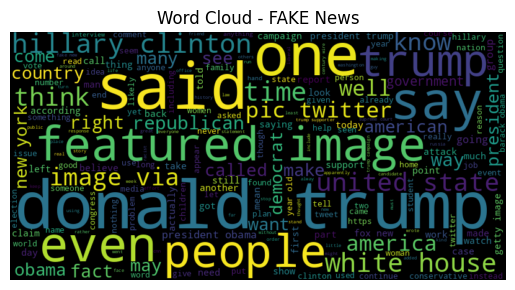

In [ ]:
# Word Cloud (Optional)
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400).generate(" ".join(df[df['label']=='FAKE']['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - FAKE News')
plt.show()


##### **Summary of one key insight from each chart:**

1. 📊 Distribution of News Labels:

The dataset is fairly balanced, with slightly more fake news than real news articles.
2. 📏 Distribution of Article Lengths:

Most articles are short, with a right-skewed distribution, meaning a few are very long.
3. 📦 Article Lengths by Label (Boxplot):

Fake news articles show more variability and longer outliers compared to real news.
4. 📈 Word Count Distribution by Label:

Fake news articles generally contain more words, with a slightly higher peak in length.
5. ✒️ Character Count Distribution by Label:

Fake news tends to have higher character counts, aligning with longer article lengths.
6. 🗞️ Top Words in FAKE vs REAL News:

Fake news uses names and emotionally charged words, while real news favors neutral, institutional language.

## **Model Training**

### **Data Splitting**

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42)

### **Dataset Dimensions after Train-Test Split**

In [ ]:
print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)



Training set size: (35918,)
Test set size: (8980,)


### **TF-IDF Vectorization**

**TF-IDF Vectorization** is used to convert the text data into numerical features based on the importance of words. It helps highlight the unique and relevant terms by reducing the weight of commonly occurring words. This transformation enables machine learning models to effectively understand and classify the news articles as fake or real.

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

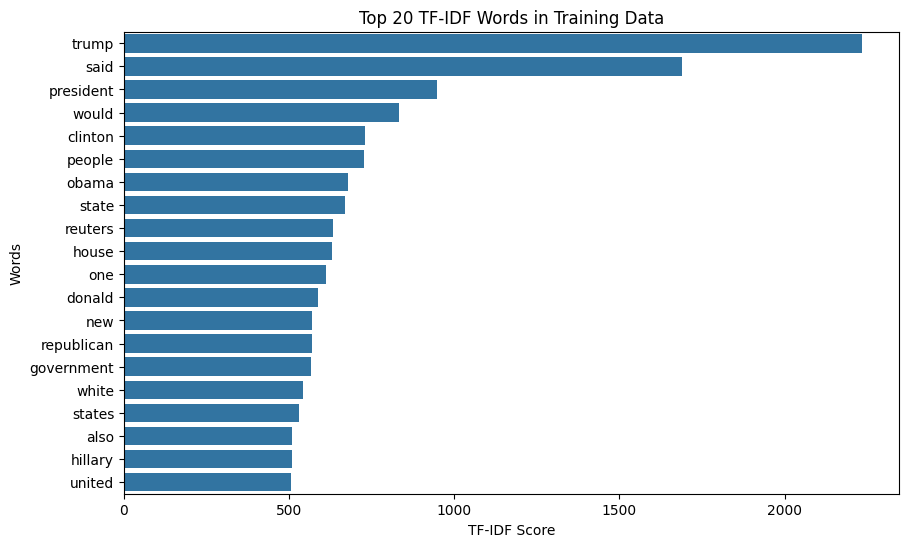

In [ ]:
# Top TF-IDF Words
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_train_vec.toarray(), columns=feature_names)
top_tfidf_words = tfidf_df.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tfidf_words.values, y=top_tfidf_words.index)
plt.title("Top 20 TF-IDF Words in Training Data")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.show()




**Insight:**
The words "trump", "said", and "president" hold the highest TF-IDF scores, indicating that these words are highly distinctive and relevant in distinguishing the articles in the training data, especially in the context of real vs. fake news classification

In [ ]:
# Sparsity
non_zeros = X_train_vec.count_nonzero()
total_elements = X_train_vec.shape[0] * X_train_vec.shape[1]
sparsity = 1.0 - (non_zeros / total_elements)
print(f"TF-IDF Matrix Sparsity: {sparsity:.2%}")

TF-IDF Matrix Sparsity: 97.40%


**Insight:**
The TF-IDF matrix has a sparsity of 97.40%, meaning that only 2.6% of the values are non-zero. This indicates that most words appear in only a few documents, which is typical for text data.

In [ ]:
# Sample Vector
sample_index = 0
sample_vector = X_train_vec[sample_index].toarray().flatten()
non_zero_indices = sample_vector.nonzero()[0]
print("Sample News TF-IDF Vector (non-zero values only):")
for idx in non_zero_indices:
    print(f"{feature_names[idx]}: {sample_vector[idx]:.4f}")

Sample News TF-IDF Vector (non-zero values only):
allegations: 0.0729
area: 0.0713
armed: 0.0746
army: 0.0722
asked: 0.1014
august: 0.0709
authorities: 0.2062
authorized: 0.0995
behind: 0.0627
bring: 0.0679
carried: 0.0819
children: 0.0642
civilian: 0.0954
claimed: 0.0708
clear: 0.0558
closely: 0.0860
communities: 0.0832
company: 0.0674
concerns: 0.0683
confirmed: 0.0704
declined: 0.0720
denies: 0.0862
destroy: 0.0853
details: 0.0719
eastern: 0.0818
effort: 0.0651
efforts: 0.0636
employees: 0.0797
enforcement: 0.0725
ensure: 0.0759
family: 0.0605
fire: 0.0715
fired: 0.0724
follows: 0.0974
friday: 0.0515
gain: 0.0884
giant: 0.0969
government: 0.0403
immediately: 0.1309
inc: 0.0848
indonesia: 0.1117
injured: 0.0895
killed: 0.0627
large: 0.0676
largest: 0.0713
law: 0.0484
least: 0.0574
liberation: 0.1086
light: 0.0806
links: 0.0879
maintain: 0.0874
media: 0.0484
members: 0.0551
miles: 0.0855
mine: 0.3137
mining: 0.2047
move: 0.0584
named: 0.0752
national: 0.0456
near: 0.0683
number: 0.059

**🔍 Insight from Sample TF-IDF Vector (11th Sample)**

This news article focuses on conflict-related topics—“mine,” “mining,” “shootings,” “separatist,” “police,” “injured,” “government,” and “workers” are some of the most weighted terms. These high TF-IDF scores suggest the article discusses violence, enforcement, and political issues in a specific region, possibly referencing unrest or civil disturbance. This kind of word pattern can help a classifier distinguish real vs fake news based on term relevance and context.

### **Naive Bayes Model**

In [ ]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)


MultinomialNB()

### **Logistic Regression Model**

In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

### **Random Forest**

In [ ]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

## **Model Evaluation**

In [ ]:
# Prepare predictions and probabilities for evaluation
y_pred_nb = nb_model.predict(X_test_vec)
y_prob_nb = nb_model.predict_proba(X_test_vec)[:, 1]

y_pred_lr = lr_model.predict(X_test_vec)
y_prob_lr = lr_model.predict_proba(X_test_vec)[:, 1]

y_pred_rf = rf_model.predict(X_test_vec)
y_prob_rf = rf_model.predict_proba(X_test_vec)[:, 1]

# Dictionary to hold model results
models = {
    'Naive Bayes': (nb_model, y_test, y_pred_nb, y_prob_nb),
    'Logistic Regression': (lr_model, y_test, y_pred_lr, y_prob_lr),
    'Random Forest': (rf_model, y_test, y_pred_rf, y_prob_rf),

}

In [ ]:
for name, (model, y_true, y_pred, y_prob) in models.items():
    print(f"\n📌 [{name} Evaluation]")
    print("✔ Accuracy       :", accuracy_score(y_true, y_pred))
    print("✔ Precision      :", precision_score(y_true, y_pred, pos_label='REAL'))
    print("✔ Recall         :", recall_score(y_true, y_pred, pos_label='REAL'))
    print("✔ F1-Score       :", f1_score(y_true, y_pred, pos_label='REAL'))
    print("✔ AUC-ROC        :", roc_auc_score((y_true == 'REAL').astype(int), y_prob))


📌 [Naive Bayes Evaluation]
✔ Accuracy       : 0.929064587973274
✔ Precision      : 0.9320066334991708
✔ Recall         : 0.9183006535947712
✔ F1-Score       : 0.9251028806584363
✔ AUC-ROC        : 0.9774343084763718

📌 [Logistic Regression Evaluation]
✔ Accuracy       : 0.9879732739420936
✔ Precision      : 0.9849047840222944
✔ Recall         : 0.9899626517273576
✔ F1-Score       : 0.9874272409778813
✔ AUC-ROC        : 0.9987893723645052

📌 [Random Forest Evaluation]
✔ Accuracy       : 0.9973273942093541
✔ Precision      : 0.9965034965034965
✔ Recall         : 0.9978991596638656
✔ F1-Score       : 0.9972008397480756
✔ AUC-ROC        : 0.9999255132206205


#### **Classification Report**

In [ ]:
print("\nDetailed Report:")
print(classification_report(y_true, y_pred))


Detailed Report:
              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00      4696
        REAL       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



#### **Confusion Matrix**

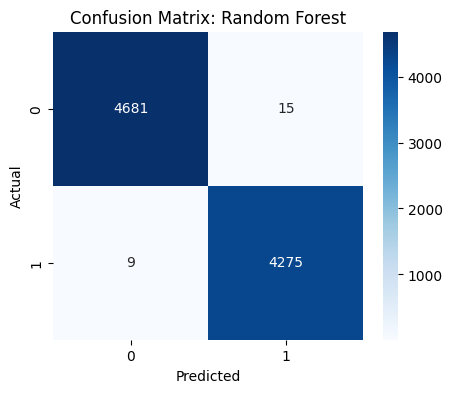

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix: {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**📌 Insight:**

The model made only 24 misclassifications (15 false positives and 9 false negatives) out of 8980 predictions, demonstrating exceptional classification accuracy for both fake and real news categories.

#### **Precision-Recall Curve**

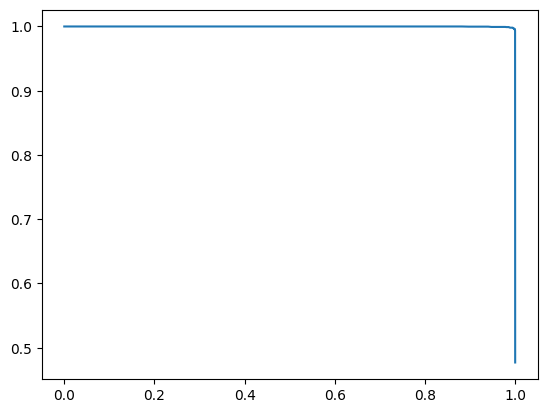

In [ ]:
precision, recall, _ = precision_recall_curve((y_true == 'REAL').astype(int), y_prob)
plt.plot(recall, precision, label=f"{name} (AP = {average_precision_score((y_true == 'REAL').astype(int), y_prob):.2f})")


**📌 Insight:**
The ROC curve for the model hugs the top-left corner, indicating excellent classification performance with a near-perfect trade-off between True Positive Rate and False Positive Rate — aligned with the AUC score of 0.9999 for Random Forest.

#### **ROC Curve Comparison**

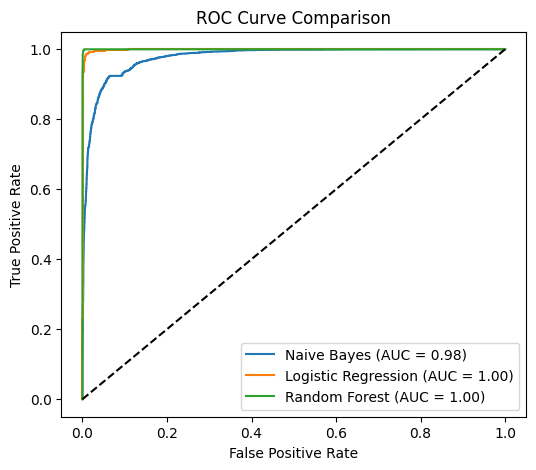

In [ ]:
# ROC Curve Comparison
plt.figure(figsize=(6, 5))
for name, (_, y_true, _, y_prob) in models.items():
    fpr, tpr, _ = roc_curve((y_true == 'REAL').astype(int), y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score((y_true == 'REAL').astype(int), y_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


<ipython-input-39-89916bb72a40>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


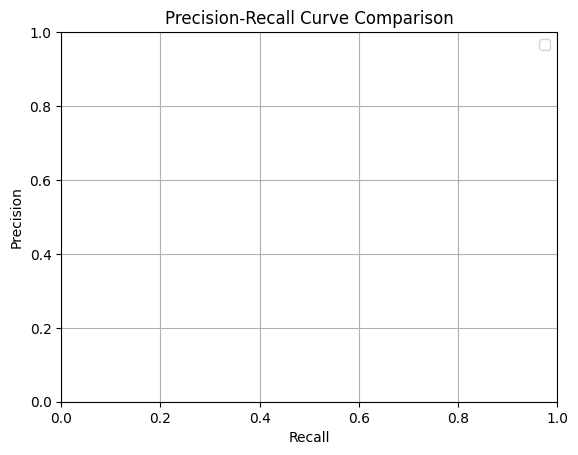

In [ ]:
# Precision-Recall Curve Comparison
plt.title("Precision-Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()


## **💬 Sentiment Analysis using VADER**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment_scores'] = df['clean_text'].apply(sia.polarity_scores)

# Expand the sentiment scores into separate columns
df = pd.concat([df, df['sentiment_scores'].apply(pd.Series)], axis=1)

# Categorize compound score into Sentiment Labels
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['compound'].apply(get_sentiment_label)

# Show sentiment breakdown
print("\nSentiment label distribution:")
print(df['sentiment_label'].value_counts())



Sentiment label distribution:
sentiment_label
Positive    22091
Negative    21270
Neutral      1537
Name: count, dtype: int64


👉 Most news headlines are either **Positive (22091) or Negative (21270),** with **Neutral sentiments (1537)** being significantly fewer, indicating a strong polarity in the dataset.

### **📊 Sentiment distribution overall**

<ipython-input-42-594f14b9efcc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='coolwarm')


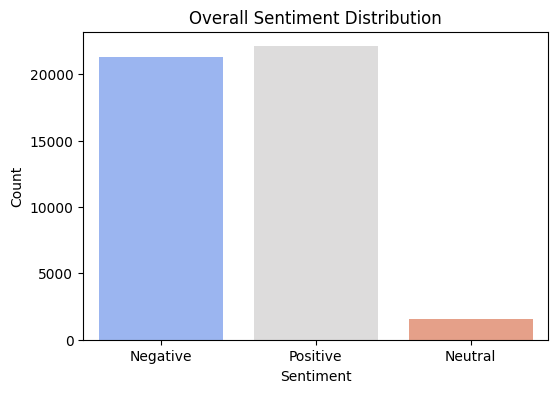

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


The sentiment distribution shows a nearly balanced split between positive and negative sentiments, with a slightly higher count of positive headlines. Neutral sentiment is significantly lower, indicating that most headlines carry a clear emotional tone. This imbalance, especially the low presence of neutral sentiment, may influence model performance and should be addressed through techniques like resampling or adjusting class weights.

### **📊 Sentiment by News Label (FAKE vs REAL)**

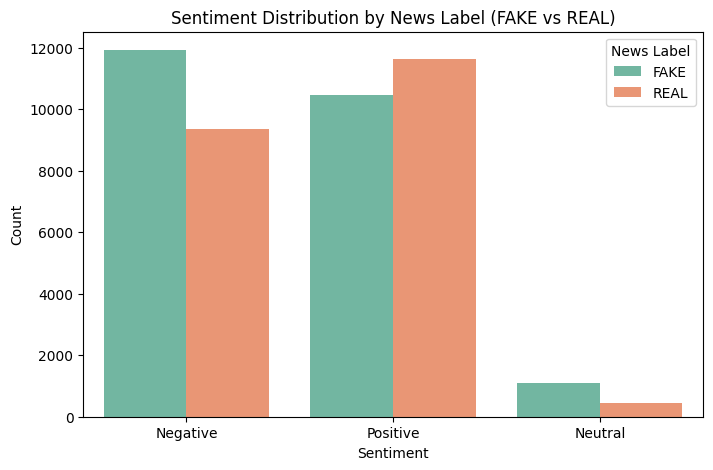

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment_label', hue='label', palette='Set2')
plt.title("Sentiment Distribution by News Label (FAKE vs REAL)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title='News Label')
plt.show()


The sentiment distribution across FAKE and REAL news reveals that FAKE news tends to have more negative sentiments compared to REAL news, while REAL news shows a higher proportion of positive sentiments. Neutral sentiments remain relatively low for both categories, with FAKE news slightly higher in this regard. This suggests that FAKE news often uses more emotionally charged language, especially with a negative tone, which could be a useful feature in identifying misinformation.


### **📈 Sentiment score trends per label**

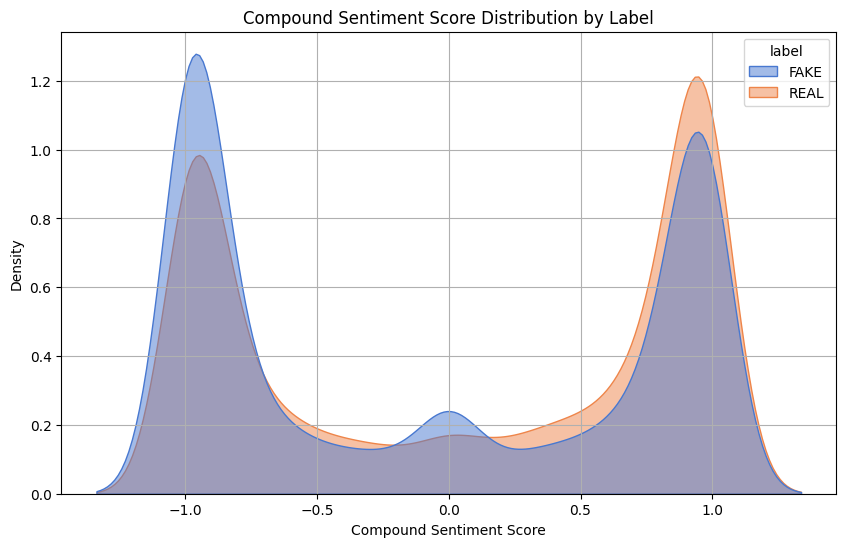

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='compound', hue='label', fill=True, common_norm=False, palette='muted', alpha=0.5)
plt.title('Compound Sentiment Score Distribution by Label')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()


The distribution of compound sentiment scores for FAKE and REAL news reveals a clear polarization towards extreme values. FAKE news shows a slightly higher peak around -1, indicating a stronger presence of highly negative sentiments, while REAL news shows a more prominent peak around +1, reflecting more strongly positive sentiments. Both types of news exhibit low density around the neutral score (0), suggesting that emotionally charged language—either highly positive or negative—is more prevalent in both FAKE and REAL headlines, but the tone varies between the two.

### **🧾 Group-wise sentiment statistics**

In [ ]:
sentiment_summary = df.groupby(['label', 'sentiment_label']).size().unstack()
print("\nGroup-wise sentiment distribution (counts):")
print(sentiment_summary)


Group-wise sentiment distribution (counts):
sentiment_label  Negative  Neutral  Positive
label                                       
FAKE                11922     1084     10475
REAL                 9348      453     11616


👉 REAL news tends to have more **Positive sentiment** (11616), while FAKE news leans slightly more towards Negative sentiment (11922), suggesting that fake headlines may often use **more negative language.**

In [ ]:
# Optional: Show sample predictions
print("\nSample Sentiment Label Predictions:")
print(df[['title', 'label', 'sentiment_label']].sample(5))
# Optional: Save to CSV if needed
# df.to_csv("news_with_sentiment.csv", index=False)


Sample Sentiment Label Predictions:
                                                   title label sentiment_label
41684  PRESIDENT TRUMP WEIGHS Executive Order On WELF...  FAKE        Positive
9532   Treasury's Mnuchin concerned about alternate s...  REAL        Positive
20039  Pelosi re-elected to House Democratic leadersh...  REAL        Positive
29156  Planned Parenthood Fundraises Over Shooting…On...  FAKE        Negative
26394  Former friend Malaysia halts all imports from ...  REAL        Positive


## **Feature Importance & Model Explainability**

### ✅ **1. Logistic Regression Coefficients**

In [ ]:
# Extract feature names and their importance from Logistic Regression
feature_names = vectorizer.get_feature_names_out()
coefficients = lr_model.coef_[0]

In [ ]:
# Create a DataFrame for easy sorting and visualization
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': coefficients})

In [ ]:
# Top 20 features indicating REAL news
top_real_features = feature_importance.sort_values(by='importance', ascending=False).head(20)

In [ ]:
# Top 20 features indicating FAKE news
top_fake_features = feature_importance.sort_values(by='importance').head(20)

In [ ]:
# 🔥 Visualize top features for REAL and FAKE news
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<ipython-input-52-7db9694e6df3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_real_features, palette='Greens_r')
<ipython-input-52-7db9694e6df3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_fake_features, palette='Reds_r')


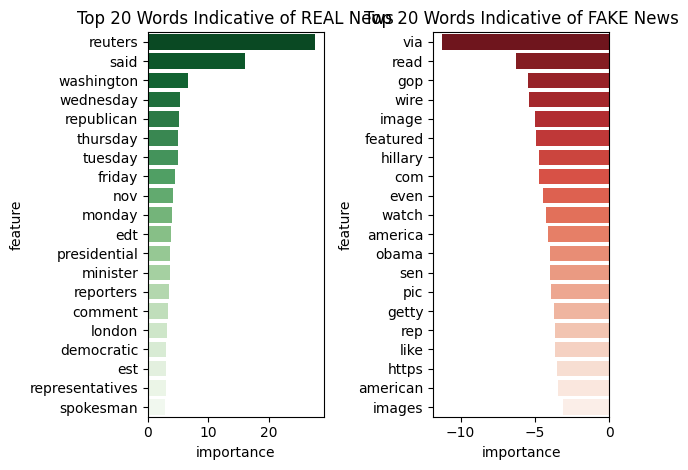

In [ ]:
# Real News Indicators
plt.subplot(1, 2, 1)
sns.barplot(x='importance', y='feature', data=top_real_features, palette='Greens_r')
plt.title("Top 20 Words Indicative of REAL News")

# Fake News Indicators
plt.subplot(1, 2, 2)
sns.barplot(x='importance', y='feature', data=top_fake_features, palette='Reds_r')
plt.title("Top 20 Words Indicative of FAKE News")
plt.tight_layout()
plt.show()


The visualization highlights the most influential words distinguishing REAL from FAKE news. Terms like "reuters", "said", and weekday names (e.g., "wednesday", "friday") are strongly associated with REAL news, suggesting a structured, report-oriented style often referencing time, official statements, or sources. In contrast, words such as "via", "read", "gop", and names like "hillary" and "obama" are more indicative of FAKE news, often reflecting informal sharing, sensationalism, or political focus. This contrast suggests that REAL news emphasizes reporting and attribution, while FAKE news leans towards emotionally charged or clickbait content.

### **✅ 2. Random Forest Feature Importance**

<ipython-input-53-7878b1a676da>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_rf_features, palette='viridis')


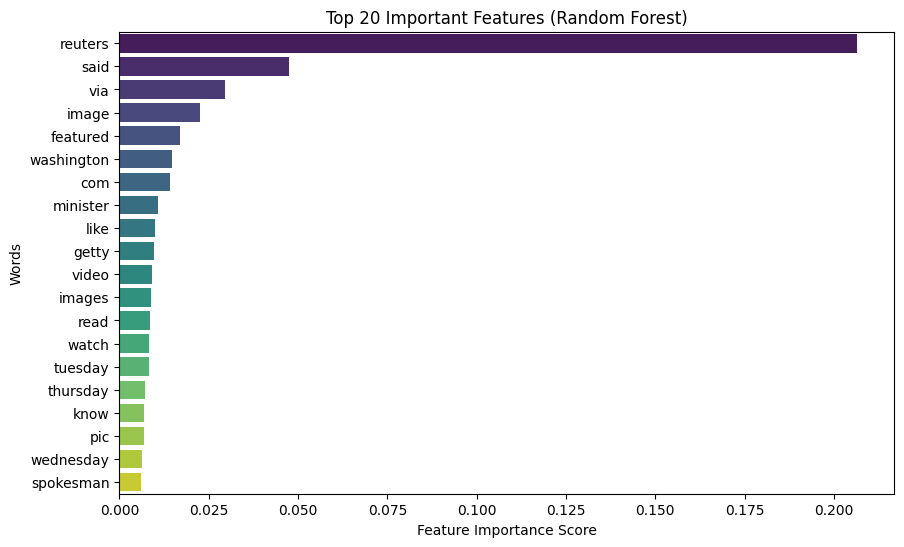

In [ ]:
# Feature importance from Random Forest
rf_importances = rf_model.feature_importances_
rf_feature_df = pd.DataFrame({'feature': feature_names, 'importance': rf_importances})

# Top 20 important features
top_rf_features = rf_feature_df.sort_values(by='importance', ascending=False).head(20)

# 🔍 Visualize
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top_rf_features, palette='viridis')
plt.title("Top 20 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Words")
plt.show()


The Random Forest feature importance plot reveals that the word **"reuters"** is by far the most influential in distinguishing between REAL and FAKE news, followed by **"said"**, **"via"**, and **"image"**. Many of the top features like **"minister"**, **"spokesman"**, and weekday names (e.g., **"tuesday"**, **"wednesday"**) are typical in formal news reporting, reinforcing authenticity. On the other hand, words like **"via"**, **"image"**, **"featured"**, and **"getty"** suggest multimedia-heavy or viral-style content, often seen in less credible sources. This distribution reflects how genuine news tends to use structured reporting language, while fake news often leans on visual or emotionally engaging terms.

## **Save & Export Trained Models**

### **✅ 1. Install & Import Required Package**

In [ ]:
import joblib

### **✅ 2. Save Models and Vectorizer**

In [ ]:
# Save TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save models
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(lr_model, 'logistic_regression_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

### **✅ 3. Load Models (when needed)**

In [ ]:
# Example: Load vectorizer and logistic regression model
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
loaded_lr_model = joblib.load('logistic_regression_model.pkl')

# Predict using loaded model
sample_text = ["Government confirms record-breaking vaccination drive."]
sample_cleaned = [clean_text(sample_text[0])]
sample_vectorized = loaded_vectorizer.transform(sample_cleaned)
sample_prediction = loaded_lr_model.predict(sample_vectorized)
print("Prediction:", sample_prediction[0])


Prediction: FAKE


##**🧾Alt Step: Build an Interactive App with Streamlit**

####**✅ 1. Install Streamlit**

In [ ]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


#### **✅ 2. Create a Python File (app.py)**

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load saved model and vectorizer (if you saved them)
# For Colab live use, use directly defined `lr_model` and `vectorizer` from your notebook

# Cleaning function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))
    tokens = word_tokenize(text.lower())
    filtered = [word for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(filtered)

# UI Layout
st.title("📰 Fake vs Real News Detector")
st.markdown("Enter the **news content** below, and the model will predict whether it's REAL or FAKE.")

user_input = st.text_area("Enter News Article Text", height=200)

if st.button("Predict"):
    if user_input.strip() == "":
        st.warning("Please enter text to classify.")
    else:
        cleaned = clean_text(user_input)
        vectorized = vectorizer.transform([cleaned])
        prediction = lr_model.predict(vectorized)[0]
        prob = lr_model.predict_proba(vectorized)[0]
        confidence = max(prob)

        st.success(f"Prediction: **{prediction}**  \nConfidence: **{confidence:.2%}**")


Writing app.py


#### **✅ 3. Run the App**

Since Colab doesn't support direct Streamlit serving, you can download and run the file locally with:

In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.94.95:8501

  Stopping...


#### **✅ 4. Optional: Save the Model for Future Use**

In [ ]:
# In your Colab notebook:
import joblib
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
# Then download these and load in your Streamlit app with:
lr_model = joblib.load('lr_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')